In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

In [3]:
df = pd.read_csv('../../Data/SAP_numeric.csv')

In [4]:
df.head()
print(df.shape)
df.isnull().sum()

(480, 18)


Unnamed: 0                  0
gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

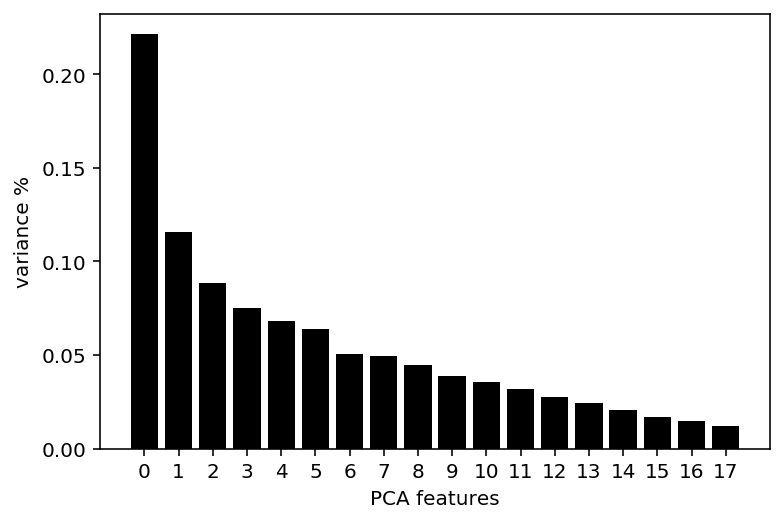

In [5]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'# Load in the data
df = pd.read_csv('../../Data/SAP_numeric.csv')# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)# Create a PCA instance: pca
pca = PCA(n_components=18)
principalComponents = pca.fit_transform(X_std)# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

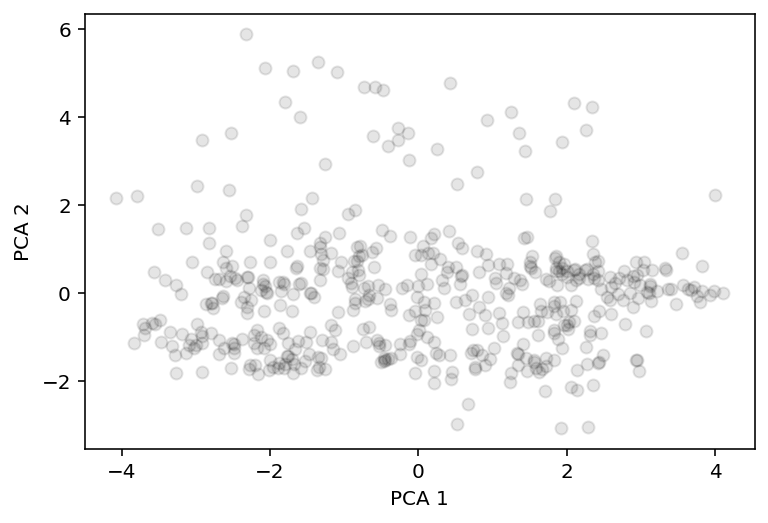

In [6]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


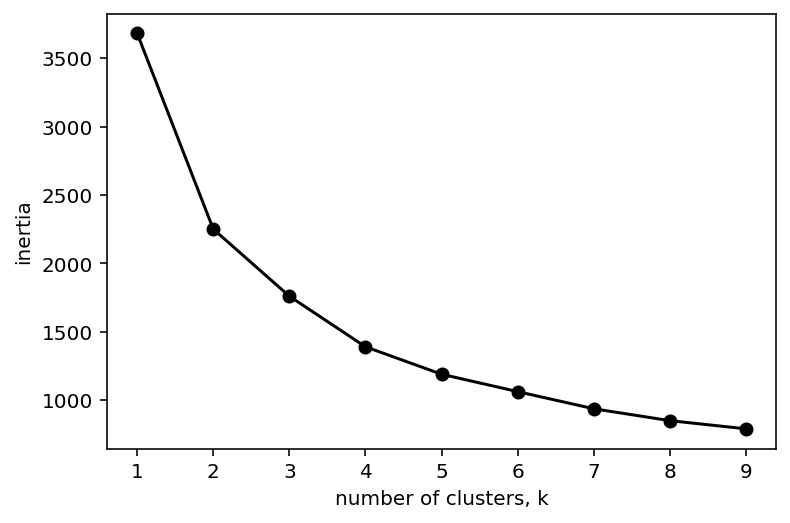

In [7]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [8]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(PCA_components)

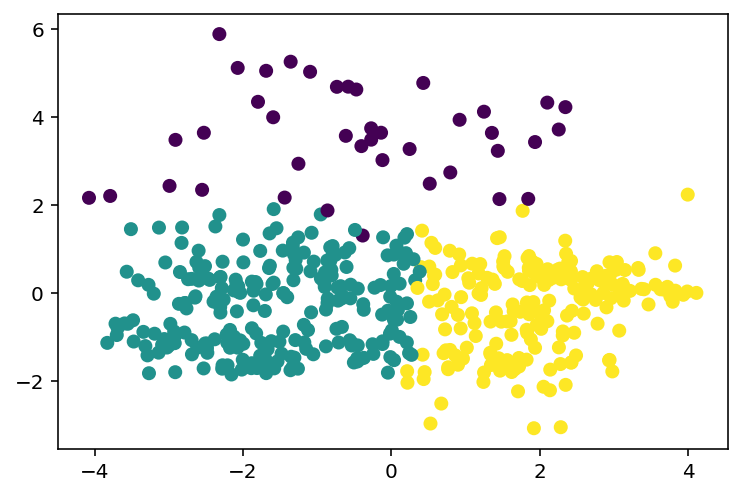

In [9]:
plt.scatter(PCA_components[0], PCA_components[1],c=y_kmeans3)

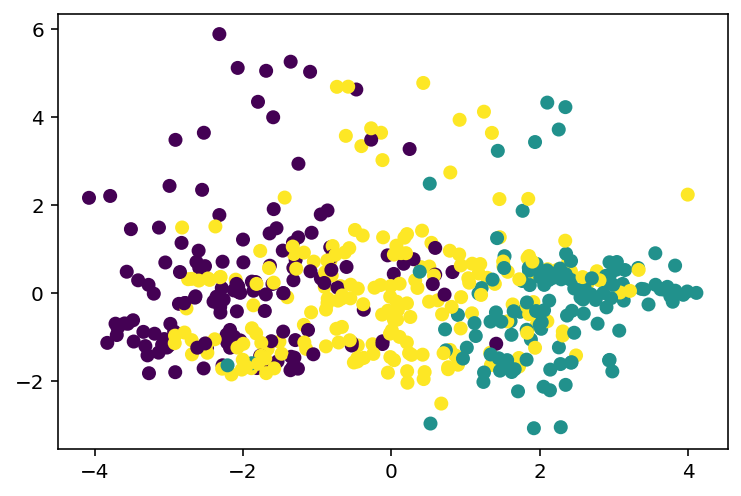

In [10]:
plt.scatter(PCA_components[0], PCA_components[1],c=df["Class"])


In [11]:
df["Class"]

0      3
1      3
2      2
3      2
4      3
      ..
475    2
476    3
477    3
478    2
479    2
Name: Class, Length: 480, dtype: int64

number are clusters:  3


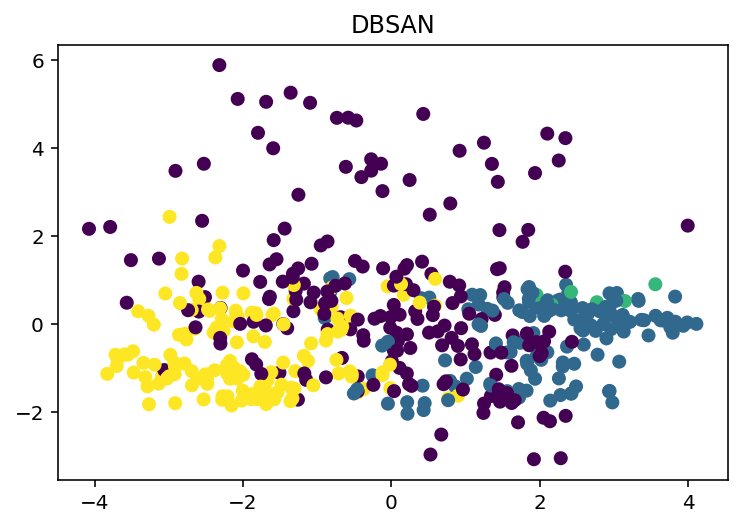

In [49]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=3.1, min_samples=7)
model = db.fit(PCA_components)
y_db_pred = db.fit_predict(PCA_components)

plt.scatter(PCA_components[0], PCA_components[1],c=y_db_pred)
plt.title("DBSAN")
labels = model.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("number are clusters: ",n_clusters)

Text(0.5, 1.0, 'Hierarchical')

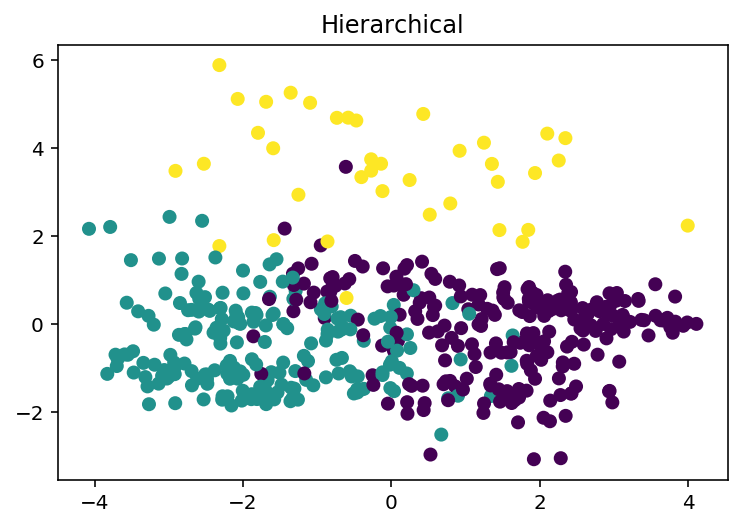

In [47]:
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters=n_clusters)
y_hier_pred = hier.fit_predict(PCA_components)
plt.scatter(PCA_components[0], PCA_components[1],c=y_hier_pred)
plt.title("Hierarchical")

(48, 80)


array([34., 67., 68., 67., 31., 67., 75., 67., 65., 60., 29., 68., 27.,
       66., 70., 66., 72., 77., 68., 60., 65., 67., 75., 67., 34., 61.,
       73., 65., 27., 39.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 65., 68.,
       70., 68., 58., 40., 70., 68., 66., 68., 75., 64., 68., 63., 60.,
       68., 58., 77., 34., 56., 58., 75., 67., 60., 72., 56., 44., 67.,
       29., 48.])

In [39]:
population[1,2:8] = np.array([5,5,5,5,5])

In [40]:
print(population[1,1:20])

[40.  5.  5.  5.  5.  5. 41. 41. 48. 46. 39. 48. 41. 48. 41. 48. 41. 49.
 42.]
